In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import numpy as np 
import pandas as pd 
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn
import random 
import time 

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle


This is a very basic example of a construction of a neural network that allows for a multiclass classification with tensorflow keras.

In [137]:
data = pd.read_csv('color_pedigree.csv')
data

,base_color_male,with_white_male,base_color_female,with_white_female,prediction_color
0,black,1,black,0,black
1,black,0,black,1,black
2,black,1,black,1,black
3,black,0,black,0,black
4,blue,0,blue,0,blue
...,...,...,...,...,...
123,creme,0,red,1,red
124,creme,0,creme,1,creme
125,creme,0,black tortie,1,black tortie
126,creme,0,black tortie,1,red



We are going to separate the data. One part will be used to make predictions in the end, the other part, the most important will be used for training and testing the neural network.
This part is not mandatory, but it is for fun, and especially to show how to predict from an input.

In [138]:
data[data['base_color_male'] == 'creme'] = 'silver'
data[data['base_color_male'] == 'gray'] = 'gray'

In [139]:
class_labels = data['prediction_color'].unique()
class_labels

array(['black', 'blue', 'red', 'silver', 'black tortie', 'blue tortie'],
      dtype=object)

In [80]:
data = shuffle(data)


i = 8
data_to_predict = data.reset_index(drop = True)
predict_species = data_to_predict.prediction_color 
predict_species = np.array(predict_species)
prediction = np.array(data_to_predict.drop(['prediction_color'],axis= 1))

data = data.reset_index(drop = True)





In [102]:
X = data.drop(['prediction_color'], axis = 1)
X = np.array(X)
Y = data['prediction_color']





We must transform the column of classes, because we have a format 'str', and it is a multiclass situation. We must first convert the names of species into numerical values, then into vectors for the output of the neuron network. 


In [104]:
X.shape

(128, 12)

In [82]:
# Transform name species into numerical values 
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)
#print(Y)

# We have 3 classes : the output looks like : 
#0,0,1 : Class 1
#0,1,0 : Class 2
#1,0,0 : Class 3

In [83]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.1, random_state = 0)

In [91]:
len(data.columns) - 1

4

In [92]:
len(data.columns)

5


It's time to build our neural network. The dimension in input is the number of features of the dataframe (without the class to predict!).

We are on a multiclass classification situation, so the activation function for the last most suitable layer is "softmax", and "categorical_crossentropy" for the loss.

We have to do several tests to find the best architecture, but this one works pretty well

In [94]:
input_dim = len(data.columns) - 1

model = Sequential()
model.add(Dense(8, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_x, train_y, epochs = 20, batch_size = 2)


Epoch 1/20
58/58 [==============================] - 0s 2ms/step - loss: 1.7084 - accuracy: 0.2696
Epoch 2/20
58/58 [==============================] - 0s 1ms/step - loss: 1.5031 - accuracy: 0.4000
Epoch 3/20
58/58 [==============================] - 0s 1ms/step - loss: 1.3635 - accuracy: 0.4174
Epoch 4/20
58/58 [==============================] - 0s 1ms/step - loss: 1.2327 - accuracy: 0.4522
Epoch 5/20
58/58 [==============================] - 0s 1ms/step - loss: 1.0966 - accuracy: 0.5217
Epoch 6/20
58/58 [==============================] - 0s 1ms/step - loss: 0.9781 - accuracy: 0.6957
Epoch 7/20
58/58 [==============================] - 0s 1ms/step - loss: 0.8707 - accuracy: 0.6957
Epoch 8/20
58/58 [==============================] - 0s 1ms/step - loss: 0.7772 - accuracy: 0.7043
Epoch 9/20
58/58 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.7391
Epoch 10/20
58/58 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7565
Epoch 11/20
58/58 [


It is time to make predictions with the small sample removed from the base at the beginning.
To train the neural network it was necessary to convert the species into vectors. So after the prediction it is necessary to carry out the opposite operation to recover the name of the associated species

In [100]:
predictions = model.predict([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_ = encoder.inverse_transform(prediction_)

for i, j in zip(prediction_ , predict_species):
    print( " the nn predict {}, and the species to find is {}".format(i,j))

 the nn predict black, and the species to find is black tortie


In [96]:
train_x[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

# Experiment 2

In [204]:
df = pd.read_csv('color_pedigree.csv')

In [205]:
df.head()

,base_color_male,with_white_male,base_color_female,with_white_female,prediction_color
0,black,1,black,0,black
1,black,0,black,1,black
2,black,1,black,1,black
3,black,0,black,0,black
4,blue,0,blue,0,blue


In [206]:
df['base_color_male'] = df['base_color_male'].replace({'blue': 'gray', 'red': 'orange', 'creme': 'silver'})

In [207]:
df['base_color_female'] = df['base_color_female'].replace({'blue tortie': 'gray tortie', 'blue': 'gray', 'red': 'orange', 'creme': 'silver'})

In [208]:
df['prediction_color'] = df['prediction_color'].replace({'blue tortie': 'gray tortie', 'blue': 'gray', 'creme':'silver','red':'orange'})

In [209]:
df['prediction_color'].unique()

array(['black', 'gray', 'orange', 'silver', 'black tortie', 'gray tortie'],
      dtype=object)

In [210]:
df['base_color_male'].unique()

array(['black', 'gray', 'orange', 'silver'], dtype=object)

In [211]:
df['base_color_male'] = df['base_color_male'].map({'black':0,'gray':1, 'orange':2,'silver':3})

In [212]:
df['base_color_female'].unique()

array(['black', 'gray', 'orange', 'silver', 'black tortie', 'gray tortie'],
      dtype=object)

In [213]:
df['base_color_female'] = df['base_color_female'].map({'black':0,'gray':1, 'orange':2,'silver':3, 'black tortie':4, 'gray tortie': 5})

In [214]:
df['prediction_color'].unique()

array(['black', 'gray', 'orange', 'silver', 'black tortie', 'gray tortie'],
      dtype=object)

In [215]:
X = df.drop(['prediction_color'], axis = 1)
Y = df['prediction_color']

In [216]:
X

,base_color_male,with_white_male,base_color_female,with_white_female
0,0,1,0,0
1,0,0,0,1
2,0,1,0,1
3,0,0,0,0
4,1,0,1,0
...,...,...,...,...
123,3,0,2,1
124,3,0,3,1
125,3,0,4,1
126,3,0,4,1


In [217]:
Y

0             black
1             black
2             black
3             black
4              gray
           ...     
123          orange
124          silver
125    black tortie
126          orange
127     gray tortie
Name: prediction_color, Length: 128, dtype: object

In [218]:
X = X.astype(float)
X = np.array(X)

In [223]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)

In [224]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3)

In [225]:
model = Sequential()
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(132, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'] )

history = model.fit(X_train, y_train, epochs = 500, batch_size = 2)


Epoch 1/500
45/45 [==============================] - 0s 1ms/step - loss: 1.6993 - accuracy: 0.3596
Epoch 2/500
45/45 [==============================] - 0s 1ms/step - loss: 1.5548 - accuracy: 0.3933
Epoch 3/500
45/45 [==============================] - 0s 1ms/step - loss: 1.4716 - accuracy: 0.4045
Epoch 4/500
45/45 [==============================] - 0s 2ms/step - loss: 1.3974 - accuracy: 0.4157
Epoch 5/500
45/45 [==============================] - 0s 1ms/step - loss: 1.3270 - accuracy: 0.4719
Epoch 6/500
45/45 [==============================] - 0s 2ms/step - loss: 1.2780 - accuracy: 0.4831
Epoch 7/500
45/45 [==============================] - 0s 2ms/step - loss: 1.2068 - accuracy: 0.4831
Epoch 8/500
45/45 [==============================] - 0s 2ms/step - loss: 1.1609 - accuracy: 0.5169
Epoch 9/500
45/45 [==============================] - 0s 2ms/step - loss: 1.1445 - accuracy: 0.5393
Epoch 10/500
45/45 [==============================] - 0s 1ms/step - loss: 1.1104 - accuracy: 0.4831
Epoch 11/

45/45 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7753
Epoch 84/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7303
Epoch 85/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7303
Epoch 86/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7528
Epoch 87/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7528
Epoch 88/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7865
Epoch 89/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7978
Epoch 90/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7978
Epoch 91/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.7865
Epoch 92/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.7753
Epoch 93/500


45/45 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.7978
Epoch 165/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.7865
Epoch 166/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8090
Epoch 167/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.7865
Epoch 168/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.7865
Epoch 169/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.7640
Epoch 170/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8090
Epoch 171/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.7978
Epoch 172/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8427
Epoch 173/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.8202
Epoc

45/45 [==============================] - 0s 1ms/step - loss: 0.2821 - accuracy: 0.7978
Epoch 246/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.7753
Epoch 247/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.8315
Epoch 248/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8090
Epoch 249/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2746 - accuracy: 0.7640
Epoch 250/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.7865
Epoch 251/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.7640
Epoch 252/500
45/45 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.7978
Epoch 253/500
45/45 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7753
Epoch 254/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.7640
Epoc

45/45 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8090
Epoch 327/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2712 - accuracy: 0.8202
Epoch 328/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2499 - accuracy: 0.8090
Epoch 329/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.7753
Epoch 330/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.8090
Epoch 331/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2528 - accuracy: 0.7753
Epoch 332/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.7416
Epoch 333/500
45/45 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.7865
Epoch 334/500
45/45 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.7640
Epoch 335/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2511 - accuracy: 0.7978
Epoc

45/45 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.7978
Epoch 408/500
45/45 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.7865
Epoch 409/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2417 - accuracy: 0.7978
Epoch 410/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.7528
Epoch 411/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2399 - accuracy: 0.7753
Epoch 412/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.8202
Epoch 413/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2434 - accuracy: 0.7640
Epoch 414/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2488 - accuracy: 0.7416
Epoch 415/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.8090
Epoch 416/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2398 - accuracy: 0.7978
Epoc

45/45 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.8202
Epoch 489/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2339 - accuracy: 0.7753
Epoch 490/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.8090
Epoch 491/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.8202
Epoch 492/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.8202
Epoch 493/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.7865
Epoch 494/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.7978
Epoch 495/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2419 - accuracy: 0.7865
Epoch 496/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.8090
Epoch 497/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.7753
Epoc

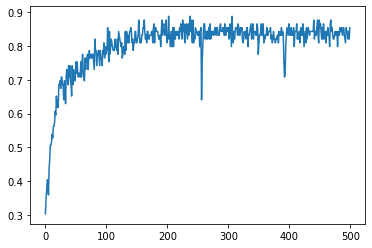

In [195]:
plt.plot(history.history['accuracy'])

# Guide for prediction

### Each color represented by numerical representation

#### Male Color with numerical representation

* black = 0
* gray = 1
* orange = 2
* silver = 3


#### Female Color with numerical representation
* black = 0 
* gray = 1
* orange = 2
* silver = 3
* black tortie = 4
* gray tortie = 5

#### Output
* black
* gray
* orange
* silver
* black tortie
* gray tortie

In [196]:
# Output Prediction
for i in range(1, len(X_test)):
    pred = model.predict(X_test)[i]
    print(np.argmax(pred))

4
5
4
2
1
4
4
4
5
2
0
1
1
3
1
4
1
0
1
1
5
5
0
4
0
4
4
4
3
0
4
0
1
1
1
2
4
0


In [197]:
# Grab the first five data from the training dataset
X_train[:5]

,base_color_male,with_white_male,base_color_female,with_white_female
86,2,1,0,0
113,3,1,5,1
127,3,0,5,1
50,1,1,2,1
54,1,1,5,1


In [198]:
# y_train[:2]
class_labels = df['prediction_color'].unique()
class_labels

array(['black', 'gray', 'orange', 'silver', 'black tortie', 'gray tortie'],
      dtype=object)

### Example

#### Lets predict the data below 
* base_color_male = <strong>black</strong>
* with_white_male = <strong>false</strong> (has no white color)

* base_color_female =<strong> gray tortie</strong>
* with_white_female = <strong>true</strong> (has white color on it)

if we were to predict above data,
then we will have to pass each value in the form of numerical  representation (see reference above)

[black, false, gray_tortie,  true]

=== after converted to numerical ===
[1, 0, 5, 1]

In [199]:
class_labels[np.argmax(model.predict([[2.0,0.0,5.0,1.0]]))]

'gray'

In [172]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                160       
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 132)               8580      
                                                                 
 dense_15 (Dense)            (None, 6)                 798       
                                                                 
Total params: 11,650
Trainable params: 11,650
Non-trainable params: 0
_________________________________________________________________


In [200]:
model.save('female_class_color_predict_model_v4')

INFO:tensorflow:Assets written to: female_class_color_predict_model_v4\assets


INFO:tensorflow:Assets written to: female_class_color_predict_model_v4\assets


In [201]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [202]:
# export_dir = 'model_female_color_1'
tf.saved_model.save(model, 'female_class_color_predict_model_v4')

INFO:tensorflow:Assets written to: female_class_color_predict_model_v4\assets


INFO:tensorflow:Assets written to: female_class_color_predict_model_v4\assets


In [203]:

converter = tf.lite.TFLiteConverter.from_saved_model('female_class_color_predict_model_v4')

# Set the optimzations
converter.optimizations = [optimization]


# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

# converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.allow_custom_ops=True
# tflite_model = converter.convert()

In [145]:
tflite_model_file = pathlib.Path('model_pedigree_female_3.tflite')
tflite_model_file.write_bytes(tflite_model)

17840

In [146]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

RuntimeError: Encountered unresolved custom op: Cast.
See instructions: https://www.tensorflow.org/lite/guide/ops_customNode number 0 (Cast) failed to prepare.Encountered unresolved custom op: Cast.
See instructions: https://www.tensorflow.org/lite/guide/ops_customNode number 0 (Cast) failed to prepare.

In [131]:
with open('labels_pedigree.txt', 'w') as f:
    for label in class_labels:
        f.writelines(f'{label}\n')